# NLP 2025
# Lab 4: Prompting Large Language Models

LLMs are everywhere nowadays. You have probably used their many times and have seen their results. You might have seen good and bad results and that often how you ask the model to do something makes a big difference.
In this lab we will have a closer look at the prompting of LLMs. While often you would need to fine-tune the model for a specific task, you will see that prompting can be a powerful tool to shape the models responses.

An important distinction between this and the previous labs is that you will have to prepare a video presentation instead of the usual report. You will find more information in the notebook.

By the end of this lab you should be able to:
- Load a pre-trained LLM
- Use the LLM to generate text
- Experiment with different prompting strategies
- Use the LLM to generate text based on the dataset
- Evaluate the generated text



### Exercises

In this lab the exercises are not graded. We will only grade the final video presentation. You can find the instructions in the last exercise ([Exercise 6](#e6)). The other exercises are there to guide you, and you should complete them as well, but they are not graded directly. However, keep in mind that the content you present on the video should correspond to findings of your notebook.

| Exercise            |
|---------------------|
| [Exercise 1](#e1)   |
| [Exercise 2](#e2)   |
| [Exercise 3](#e3)   |
| [Exercise 4](#e4)   |
| [Exercise 5](#e5)   |
| [Exercise 6](#e6)   |

The maximum grade for this lab is 0.5 points.

### 📌 **Instructions for Delivery** (📅 **Deadline: 12/May 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **video presentation** that is no longer than 5 minutes and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the presentation are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

Collaborators: list collaborators here

**I talked with Jerry about...**

Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow): list websites where you found code (or other info) as well as include information on how you used genAI tools (e.g. prompts):

I asked chatGPT about...

## 0. Setup
We start by making sure we have everything we need for this lab.


### 0.1 Using Google Colab

In this lab we will be generating text using LLMs. While we choose the small models for the exercises, they are still quite large and require a lot of memory. We recommend using google colab for this lab but you can also run it on your local machine if you have a GPU.

As mentioned before, Google Colab [https://colab.google/](https://colab.google/) gives you access to a GPU for a limited time (after you used this time you will have to wait for some time to use it again). To use a GPU you need to select the runtime type. Go to "Runtime -> Change runtime type". There you can select a CPU or a GPU.

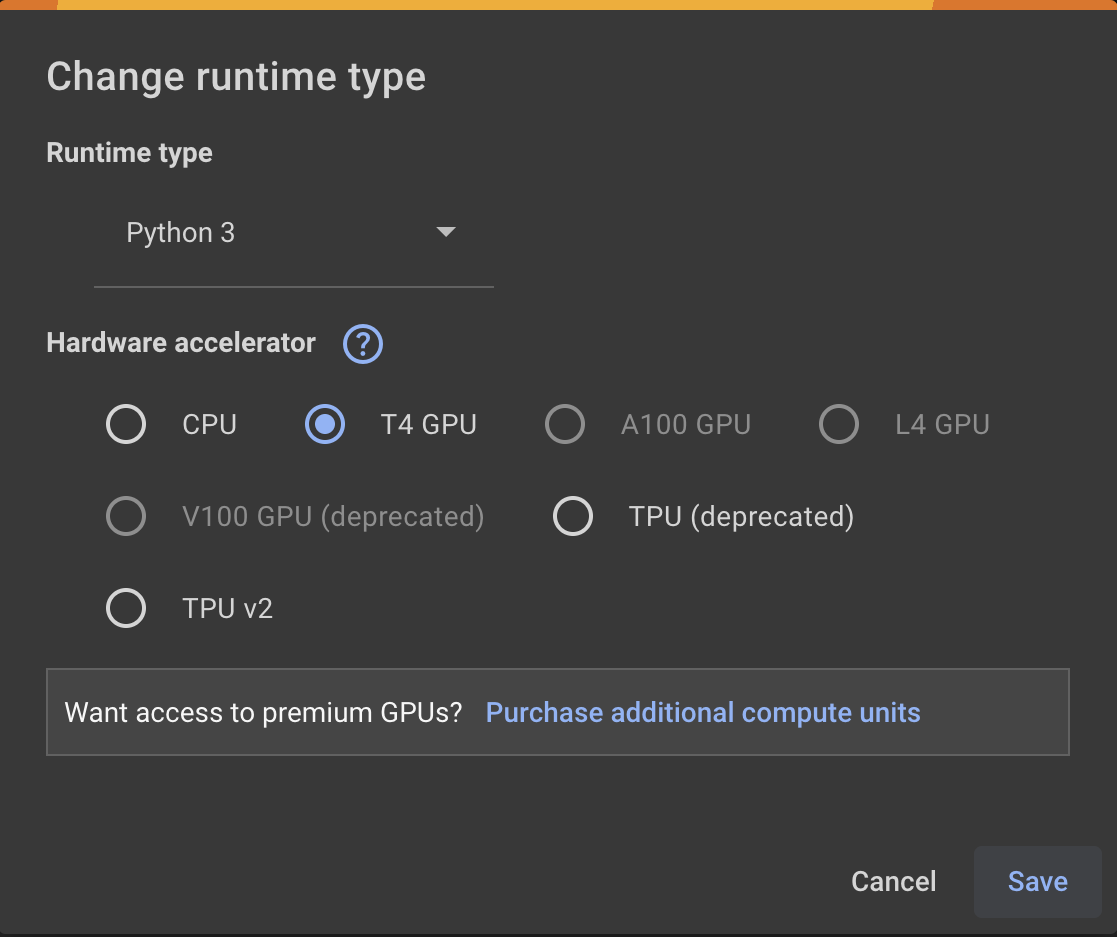

### 0.2 Installs and Imports

The following cell installs the required packages. You can run it if you are using Google Colab or if you are missing any of the packages. If you are using a local environment, you can copy the commands and run them in your terminal.

In [ ]:
! pip install -U datasets
! pip install torch torchvision torchaudio
! pip install transformers
! pip install accelerate
! pip install sacrebleu

In [ ]:
! pip list | grep -E 'torch|transformers|datasets|accelerate'

As usual, we start by importing some essential Python libraries that we will be using.

In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt
import datasets
import transformers
import tqdm
import torch
import sacrebleu

## 1. Load and Preprocess Data

For easiness and comparison purposes, we will ue the same dataset as in the previous two labs. That said, this time we will not use it for the task of information retrieval but for *sentence compression*. We will be using LLMs to generate the compressed sentences.

As a reminder:

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf). If you haven't done so for Lab 2, we strongly recommend going over the paper to gain further insights

### 1.1 Loading the Dataset

The dataset will be loaded as a huggingface dataset. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [ ]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

In [ ]:
for i in range(10):
    print(ds['train'][i])

The dataset comes with a `train` split, so we will have to split that into `train`/`test` ourselves with the line below. This time we will choose a very small test subset. This is to reduce the execution time of the lab as LLMs can take quite a long time to generate text as it is generated one token after another. In a real-world scenario, you would want to have a larger test set (e.g. 10% of the dataset).

In [ ]:
split_ds = ds['train'].train_test_split(test_size=1000, seed=1)
print(split_ds)

As in previous lab, we will be using the pre-trained tokenizer, so we will omit the cleaning process. You can still add it if you want more control over the data.

<a name='e1'></a>
### Exercise 1

Fill in the function below to unpack the `sentence` and `compressed` fields. You can copy it from the previous lab.

In [ ]:
def unpack(examples):
    """
    Unpacks the column `set` into two columns `sentence` and `compressed`.
    Args:
        examples: a batch of examples from the dataset

    Returns: modified examples with two new columns: `sentence` and `compressed`

    """
    sentences = []
    compressed_sentences = []

    ### YOUR CODE HERE





    ### YOUR CODE ENDS HERE

    examples['sentence'] = sentences
    examples['compressed'] = compressed_sentences
    return examples

In the next cell, we will apply the `unpack` function to the whole dataset. Notice that we also drop the original `set` column.

In [ ]:
split_ds = split_ds.map(unpack, batched=True, remove_columns=['set'])
print(split_ds)

for i in range(10):
    print(split_ds['train'][i])

In this lab, we will be using only pre-trained models. That means that we won't be training any new model. This is the reason we can select only the `test` subset for the rest of the notebook (this is where we will be assessing the performance of the pre-trained models). Do not delete the training subset as you will need it for the few-shot learning exercise.

In [ ]:
test_ds = split_ds['test']
print(test_ds)

### 1.2 Loading the Tokenizer

For the first part of this lab, we will be using a pre-trained LLM. We will be using the [Qwen2.5-0.5B-Instruct](https://huggingface.co/Qwen/Qwen2.5-0.5B-Instruct) model from Alibaba Cloud. The model has been instruction-tuned (hence the "Instruct" in the name). It is very small with 0.5B parameters, but it should be enough for this lab. The paper is available [here](https://arxiv.org/abs/2407.10671).

We will specify the model name that can be found on the model's card on huggingface (revisit the first link). Make sure to check what other information Huggingface is offering (e.g. how to use the model, limitations, how to inference, etc.).

In [ ]:
model_name = "Qwen/Qwen2.5-0.5B-Instruct"

The models on huggingface come with their own tokenizers. They are loaded separately from the models. We can use [AutoTokenizer](https://huggingface.co/docs/transformers/v4.40.2/en/model_doc/auto#transformers.AutoTokenizer)'s `from_pretrained()` method to load it.

Inspect the output: The loaded object is of `Qwen2TokenizerFast` class.

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

Next, let's see how we can use it to tokenize some text.

In [ ]:
print(test_ds[0]['sentence'])
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt')
print("---")
print(type(tokenized))
print("---")
print(tokenized)

Examine the outputs: This is very similar to the output of the `tokenizer` function from the previous lab. This time we have two fields:
- `input_ids` - this is a PyTorch tensor with the indices of our tokens.
- `attention_mask` - holds the mask that the model will use to determine if the tokens in the `input_ids` are the real tokens or *padding*.

Let's detokenize the output of the tokenizer and inspect the outputs.

In [ ]:
print(tokenized['input_ids'].shape)
print("---")
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print("---")
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0]))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

### 1.4 Loading the Model

In this section, we will load and examine the model. We will start with selecting the device we will place the model on. This will be a GPU (if one is available) or a CPU.

The following cell will select the device for us.

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Now, let's load the model from huggingface and place it on the device from the previous cell (the methods `to()`).

In [ ]:
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
model.to(device)
print(model)

What is the architecture of the model? You can take the outputs of the previous cell, check the model's card on huggingface, or read the paper linked above.

## 2. Prompting the Model

In this section we will explore some prompting techniques. Let us start with the very simple one: "Compress the following sentence: {SENTENCE-TO-BE-COMPRESSED} Compressed: ". The model should see text and start generating the desired output (the compressed sentence). We will use an example from the dataset to test it. The `max_new_tokens` parameter specifies the maximum number of tokens to generate. The model will be forced to stop generating when it reaches this number of tokens.

In [ ]:
sentence = test_ds[2]['sentence']
compressed = test_ds[2]['compressed']
prompt = f"Compress the following sentence: {sentence} Compressed: "

model_inputs = tokenizer([prompt], return_tensors="pt").to(model.device)
print(tokenized)
output_ids = model.generate(
    **model_inputs,
    max_new_tokens=512
)

Let's examine the output. output.

In [ ]:
print(tokenizer.decode(output_ids[0], skip_special_tokens=False))

You can see that our prompt is included in the output. The next cell should fix that.

In [ ]:
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, output_ids)
]

We can re-examine the output. The `generated_ids` variable contains the generated tokens. We can decode them to get the generated text.

In [ ]:
print(generated_ids)

generated_decoded = tokenizer.decode(generated_ids[0], skip_special_tokens=True)
print('full sentence:')
print(sentence)
print()
print('generated:')
print(generated_decoded)
print()
print('expected:')
print(compressed)
print()


The response of the model is probably not great. This is because it has been trained as a chat-bot and it requires a certain structure of the conversation. Below the same prompt is passed to the chat template with a system prompt `You are Qwen, created by Alibaba Cloud. You are a helpful assistant.`. It is included in the `messages` list below. Let us see the result for the same prompt.

In [ ]:
messages = [
    {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)

print(text)

We can try this out using the next cell.

In [ ]:
sentence = test_ds[2]['sentence']
compressed = test_ds[2]['compressed']
prompt = f"Compress the following sentence: {sentence} Compressed: "

messages = [
    {"role": "system", "content": "You are Qwen, created by Alibaba Cloud. You are a helpful assistant."},
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

output_ids = model.generate(
    **model_inputs,
    max_new_tokens=512
)
generated_ids = [
    output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, output_ids)
]

generated_decoded = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]

print('full sentence:')
print(sentence)
print()
print('generated:')
print(generated_decoded)
print()
print('expected:')
print(compressed)
print()

<a name='e2'></a>
### Exercise 2

Is the response as expected? Inspect more examples.

Try to improve the prompt and discuss the steps you have taken. Provide examples of the results. You should do at lest the following steps:
- Reformulate the text/wording of the prompt. Take into account the structure of the input text that is passed to the model.
- Add delimiters (such as "-----", new lines, etc.).
- Ask ChatGPT or other tool to generate a prompt for you.

In [ ]:
### YOUR CODE HERE






### YOUR CODE ENDS HERE

<a name='e3'></a>
### Exercise 3
Now let us tinker a bit with the system prompt. Try to improve the generated compressed sentences by changing the system prompt (`You are Qwen, created by Alibaba Cloud. You are a helpful assistant.`).
Did your results improve?

In [ ]:
### YOUR CODE HERE






### YOUR CODE ENDS HERE

<a name='e4'></a>
### Exercise 4

Hopefully, you got good results in the previous exercises but you probably noticed that it is not that easy to make the model generate what you want. Explaining the model what "compressed" means can be challenging.
Instead, we can use few-shot learning to show the model what we mean by "compressed". We can do this by providing a few examples of compressed sentences in the form similar to the question-answer pairs. Here is one example:
f"""
Compress the following sentence:
{example_sentence}
Compressed: {example_compressed}
Compress the following sentence:
{sentence}
Compressed: """

Where `example_sentence` and `example_compressed` are the examples from dataset guiding the model to the desired answer.

Implement a few-shot learning prompt. Use the best prompt you achieved from the previous exercises. Make sure to use example(s) from the `train` dataset.

In [ ]:
### YOUR CODE HERE






### YOUR CODE ENDS HERE

## 3. Applying it to the Dataset

In this section we will apply the model with a prompt to the whole `test` dataset. The prompt will be generated using `create_prompt` function that is passed to the function generating the compressed senetnces (`generate_compressed`). In the next section you can pass different prompt-generating functions to test their performances.

In [ ]:
def create_prompt(sentence):
    prompt = f"""Compress the following sentence: {sentence} Compressed: """
    return prompt

The next function implements the tokenization of the prompts. It expects the list of prompts to tokenize them in a batch. Batching speeds up the generation process on the GPU. The function also takes the system prompt as an argument.

In [ ]:
def tokenize_prompts(tokenizer, prompts, system_prompt):
    """
    Tokenizes the prompt for the model.
    Args:
        prompt: the prompt to use
        system_prompt: the system prompt to use

    Returns: the tokenized prompt

    """
    messages = [[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt}
    ] for prompt in prompts]
    texts = [tokenizer.apply_chat_template(
        message,
        tokenize=False,
        add_generation_prompt=True
    ) for message in messages]

    model_inputs = tokenizer(texts, return_tensors="pt", truncation=True, padding=True, padding_side='left').to(model.device)
    return model_inputs

This function iterates over the dataset in batches, generates the prompt and applies tokenization. Finally, it asks the model to generate the compressed sentences. The function returns a list of generated sentences.

In [ ]:
def generate_compressed(dataset, model, tokenizer, create_prompt_fn, batch_size=8, system_prompt='You are Qwen, created by Alibaba Cloud. You are a helpful assistant.'):
    def collate_fn(batch):
        prompts = [create_prompt_fn(example['sentence']) for example in batch]
        model_inputs = tokenize_prompts(tokenizer, prompts, system_prompt)
        return model_inputs

    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, collate_fn=collate_fn)

    all_decoded = []
    model.eval()
    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader):
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']

            output_ids = model.generate(
                input_ids=input_ids,
                attention_mask=attention_mask,
                max_new_tokens=512
            )

            generated_ids = [
                output_ids[len(input_id):]
                for input_id, output_ids in zip(input_ids, output_ids)
            ]

            generated_decoded = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
            all_decoded.extend(generated_decoded)

    return all_decoded


Here we will finally apply the model to the whole dataset. The `compressed_reference` variable will hold the reference compressed sentences and the `generated_compressed` variable will hold the generated compressed sentences.

Play around with the `batch_size` parameter to see how it affects the generation time. Incresing it should speed up the generation process, but it will also increase the memory usage.

In [ ]:
compressed_reference = [example['compressed'] for example in test_ds]
generated_compressed = generate_compressed(test_ds, model, tokenizer, create_prompt, batch_size=32)

Let's examine a couple of generated examples before we move on to the evaluation.

In [ ]:
for generated, reference in zip(generated_compressed[:10], compressed_reference[:10]):
    print(reference)
    print(generated)
    print('---')

## 4. Evaluating Prompting Strategies

In the previous section you manually examined the responses of the model. The problem with this approach is that you can only check a limited number of examples, and it is not that easy to compare the results. In this section, we will evaluate the model on the whole `test` dataset using two metrics:
- **average length** - this metric will measure how concise the model is. We will try to achieve similar average length as the reference sentences.
- **BLEU** - this metric will measure how similar the generated sentences are to the reference sentences. The BLEU score is a number between 0 and 100, and is calculated using overlap of n-grams between the hypothesis and the references. Refer ot the lecture slides and the [original paper](https://aclanthology.org/P02-1040/) for more information.

<a name='e5'></a>
### Exercise 5

Implement the following function that calculates the average length (in words, split by space) of the sentences passed as a list of strings.

In [ ]:
def calculate_average_length(sentences):
    """
    Calculate the length (in words) of the list of sentences.
    Args:
        sentences: a list of sentences
    Returns: the average length of the sentences
    """

    ### YOUR CODE HERE

    
    
    

    ### YOUR CODE ENDS HERE

We can calculate the average length of the references and the outputs of the model.

In [ ]:
reference_mean_length = calculate_average_length(compressed_reference)
generated_max_length = calculate_average_length(generated_compressed)
print(f'Mean length of the references: {reference_mean_length}')
print(f'Mean length of the generated: {generated_max_length}')

To calculate BLEU we will use the `sacrebleu` library ([https://github.com/MorinoseiMorizo/sacreBLEU](https://github.com/MorinoseiMorizo/sacreBLEU)). It expects the references to be passed as a list of lists. This was originally designed to support references from multiple translators (in the Machine Translation task), but in our case we will only use one reference for each example.

In [ ]:
bleu_metric = sacrebleu.BLEU()

bleu = bleu_metric.corpus_score(hypotheses=generated_compressed, references=[compressed_reference])

print(bleu)
print(f"BLEU score: {bleu.score}")

Now that you have all the components ready it's time to put it all into work.

## 5. Video Instructions

<a name='e6'></a>
### Exercise 6

💼 Your group is the new team of employees at LearningRateAI, a company eager to integrate Large Language Models (LLMs) into its products. 🧠 The first task from your manager is to develop a tool (powered by an LLM) that can compress long sentences into shorter ones, while still preserving the main meaning.🌟 As newcomers, you naturally want to impress everyone with your knowledge and expertise in Natural Language Processing!

You will summarize your work with a short video presentation (the graded part of the lab). Going over the notebook is not enough as the code would scare the managers. Your video should not be longer than 5 minutes (managers do not like long and boring presentations). While you can be creative with the presentation, you should cover the following points:

- a brief introduction to explain what LLMs and prompting are. make sure to state your goal (e.g. expore how prompting affects generation quality). 
- compare prompting strategies you tried (e.g. what you changed in the inputs, what you noticed in the outputs, any unexpected/interesting behavior)
- discuss the results (evaluation) of the few-shot learning. How many examples were needed to achieve the best results?
- try to find the best model for this task on the huggingface hub [https://huggingface.co/models?pipeline_tag=text-generation&sort=trending](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending) (be mindful of the size of the model).
- final conclusion/reflection: what are other considerations the company should take into account when deploying the model?

## 🎬 Instructions for your video

📏 Keep it short: Your video must be no longer than 5 minutes — we will stop watching after that.

🎯 Focus on what matters: You won’t have time to show everything you did, so prioritize the most interesting and important parts of the lab and of your findings. This is not an overview of what you did.

👔 Know your audience: You're presenting to company managers — avoid overly technical jargon or explain it clearly.
Make sure your video includes a short introduction and conclusion.

🧰 Use any format or tool you like: You can record your screen, use slides or try something creative.
Suggested tools include: Clipchamp, Powtoon, Loom, Zoom, OBS, or anything else you're comfortable with.

🎤 Everyone must speak: Each team member should present a part of the video. Use your own voice (no AI or robotic voices), and ensure the audio is clear and easy to understand.

🎭 Creativity is welcome! Have fun with it — for example: 🤖 Role play (e.g. one of you is the “LLLM”, another is the developer), 📺 tech show (e.g. like a news segment), 🎙️ narrated character story (e.g. “Meet Jerry, the intern…”). ✨ But don’t let creativity distract you from your main goals — make sure you clearly cover the prompting, experiments, results, and evaluations.

📦 What to submit:
- Upload both the video and the notebook (make sure your notebook includes all the experiments you presented).
- You can submit the video in a common format (e.g. .mp4, .mov). If we can't play it, we’ll reach out.
- Alternatively, you can share a Google Drive link or even upload it to YouTube (unlisted is fine) and send us the link.

🏆 Best video showcase:
We’ll select some of the best videos based on content and production quality — and may share them (with your permission).

### Grading rubric (indicative)

| **Criterion**               | **Max Points** | **Indicative inclusions**                                                                 |
|----------------------------|----------------|---------------------------------------------------------------------------|
| Clarity of Presentation    | 0.1            | Speech is clear; video is well-structured and within 5 min.              |
| Prompting Experiments      | 0.1            | Shows thoughtful and the most important prompting variations and interprets results.            |
| Application to Dataset     | 0.1            | Demonstrates how prompts are applied to data and interprets outputs.     |
| Evaluation of Outputs      | 0.05            | Applies meaningful evaluation and discuss results.             |
| Insights & Reflection      | 0.1           | Reflects on challenges or model behavior meaningfully.                   |
| Integrity & Acknowledgment | 0.05           | Properly discloses external help (websites, GenAI tools).                |

🟨 *Note: The notebook must be submitted and match what is presented in the video.*

In [2]:
### YOUR CODE HERE





### YOUR CODE ENDS HERE